# Original Training, Testing and Prediction

In [1]:
#import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score


In [2]:
#read the dummied data csv file 
file_path = Path("C:/Users/ayomi/OneDrive/Desktop/Data Analytics/project 4/Project_4_Group_5/Data_Cleaned/dummied_data_add_clean.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,Unnamed: 0,Number of Children,Annual Income,Age,Months Employed,Family Members,Months Since Payment,Status,Gender_F,Owns a Car_Y,...,Occupation_Managers,Occupation_Medicine staff,Occupation_Not Specified,Occupation_Pensioner,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,0,0,427500.0,32,4542,2.0,0,Paid,False,True,...,False,False,True,False,False,False,False,False,False,False
1,1,0,427500.0,32,4542,2.0,1,Paid,False,True,...,False,False,True,False,False,False,False,False,False,False
2,2,0,427500.0,32,4542,2.0,2,Paid,False,True,...,False,False,True,False,False,False,False,False,False,False
3,3,0,427500.0,32,4542,2.0,3,Paid,False,True,...,False,False,True,False,False,False,False,False,False,False
4,4,0,427500.0,32,4542,2.0,4,Paid,False,True,...,False,False,True,False,False,False,False,False,False,False


In [3]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Status'])  # Features
y = df['Status']  # Target variable

In [4]:
X.head()

,Unnamed: 0,Number of Children,Annual Income,Age,Months Employed,Family Members,Months Since Payment,Gender_F,Owns a Car_Y,Owns Property_Y,...,Occupation_Managers,Occupation_Medicine staff,Occupation_Not Specified,Occupation_Pensioner,Occupation_Private service staff,Occupation_Realty agents,Occupation_Sales staff,Occupation_Secretaries,Occupation_Security staff,Occupation_Waiters/barmen staff
0,0,0,427500.0,32,4542,2.0,0,False,True,True,...,False,False,True,False,False,False,False,False,False,False
1,1,0,427500.0,32,4542,2.0,1,False,True,True,...,False,False,True,False,False,False,False,False,False,False
2,2,0,427500.0,32,4542,2.0,2,False,True,True,...,False,False,True,False,False,False,False,False,False,False
3,3,0,427500.0,32,4542,2.0,3,False,True,True,...,False,False,True,False,False,False,False,False,False,False
4,4,0,427500.0,32,4542,2.0,4,False,True,True,...,False,False,True,False,False,False,False,False,False,False


In [5]:
y.head()

0    Paid
1    Paid
2    Paid
3    Paid
4    Paid
Name: Status, dtype: object

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train the Logistic Regression classifier
logreg_classifier = LogisticRegression(multi_class='ovr', max_iter=2000, random_state=42)



In [8]:
logreg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='ovr', random_state=42)

In [9]:
#predict on the training data
y_pred_train = logreg_classifier.predict(X_train)
results = pd.DataFrame({"Prediction": y_pred_train, "Actual": y_train}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,Paid,Minor Over
1,Minor Over,Paid
2,Paid,Minor Over
3,Paid,Paid
4,Paid,Minor Over
5,Paid,Paid
6,Minor Over,No Loan Taken
7,Paid,Minor Over
8,Paid,Paid
9,Paid,Paid


In [10]:
#predict on the test data
y_pred_test = logreg_classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred_test, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,Paid,Paid
1,Paid,Paid
2,Paid,Paid
3,Paid,Minor Over
4,Paid,Minor Over
5,Paid,No Loan Taken
6,Paid,Minor Over
7,Minor Over,Minor Over
8,Paid,No Loan Taken
9,Minor Over,No Loan Taken


In [11]:
#evaluating performance of training set
accuracy = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='weighted')
precision = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)

print('Model Performance of Train set')
print(f'Training Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Training Precision: {precision}')
print(f'Recall ratio: {recall}')

# Print the classification report for the model

target_names = ["paid", "Overdue", "no loan taken"]
print(classification_report(y_train, y_pred_train, target_names=target_names, zero_division=0))


Model Performance of Train set
Training Accuracy: 0.4755237529384413
F1 Score: 0.4218925469662362
Training Precision: 0.3850922546305604
Recall ratio: 0.4755237529384413
               precision    recall  f1-score   support

         paid       0.47      0.46      0.46    240215
      Overdue       0.00      0.00      0.00    116127
no loan taken       0.48      0.70      0.57    263034

     accuracy                           0.48    619376
    macro avg       0.32      0.39      0.34    619376
 weighted avg       0.39      0.48      0.42    619376



In [13]:
#evaluating performance of test set
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted')
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)

print('Model Performance of Test set')
print(f'Training Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Training Precision: {precision}')
print(f'Recall ratio: {recall}')

# Print the classification report for the model

target_names = ["paid", "Overdue", "no loan taken"]
print(classification_report(y_test, y_pred_test, target_names=target_names, zero_division=0))


Model Performance of Test set
Training Accuracy: 0.47413219671284185
F1 Score: 0.4202061960107215
Training Precision: 0.3828952128617863
Recall ratio: 0.47413219671284185
               precision    recall  f1-score   support

         paid       0.46      0.46      0.46     59763
      Overdue       0.00      0.00      0.00     29297
no loan taken       0.48      0.70      0.57     65785

     accuracy                           0.47    154845
    macro avg       0.31      0.39      0.34    154845
 weighted avg       0.38      0.47      0.42    154845



In [16]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred_test)

array([[27567,     0, 32196],
       [12262,     0, 17035],
       [19935,     0, 45850]], dtype=int64)

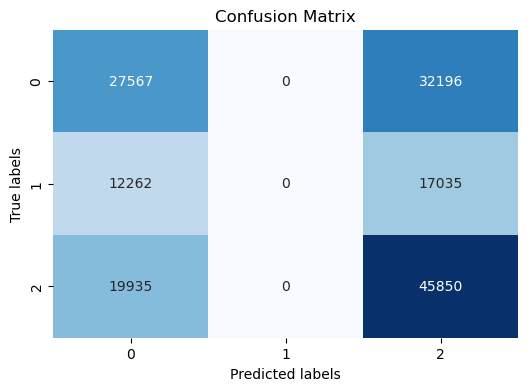

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels, respectively
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()